In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [61]:
train = pd.read_csv('titanic_train.csv')

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


- Retorna true para informações null
- Abaixo tem a visualização em heatmap dessa matriz

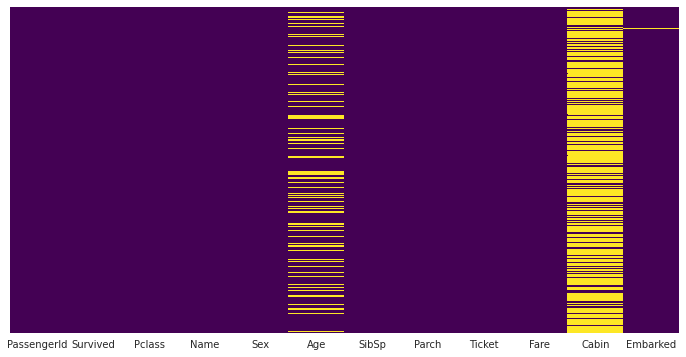

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Isso mostra que muitas informações sobre a cabine do passageiro estão ausentes
- Parte das informações de idade esta ausente
- Falta uma informação sobre embarque

### Analise exploratoria de dados
- Analisar os dados, para perceber como os dados estão e o que representam para definir o modelo a se usar

In [66]:
sns.set_style('whitegrid')

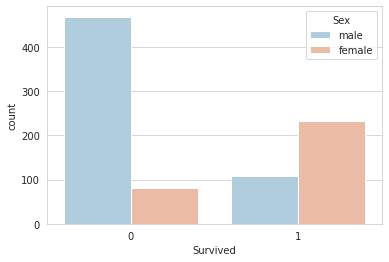

In [67]:
sns.countplot(data=train,x='Survived',hue='Sex',palette='RdBu_r')

- Mais pessoas morreram(0) do que sobreviveram(1)
- Morreram mais homens 

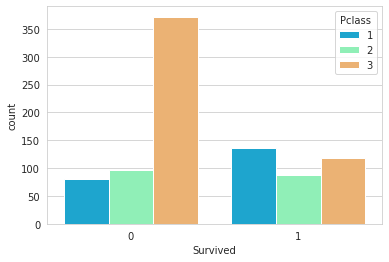

In [68]:
sns.countplot(data=train,x='Survived',hue='Pclass',palette='rainbow')

- A maioria das pessoas que morreram eram da 3 classe

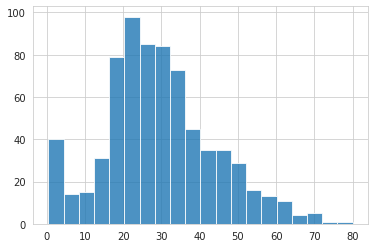

In [69]:
train['Age'].hist(bins=20,alpha=0.8)

- A idade dos passageiros é bem distribuida, sendo a maioria entre 20 e 40 anos

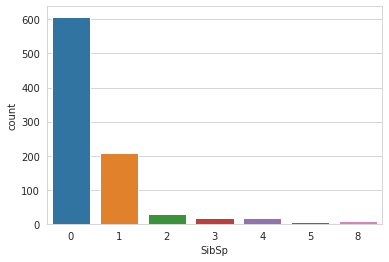

In [70]:
sns.countplot(data=train,x='SibSp')

- **Número de acompanhantes**
- é possivel notar que a grande maioria estava só ou com 1 acompanhante;
- Isso é reflexo do histograma de idades que aponta um grande número de passageiros em idade de 20 a 30 anos, inicio da vida adulta.

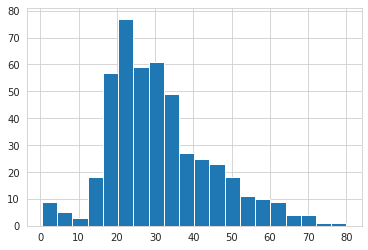

In [71]:
train[train['SibSp'] == 0]['Age'].hist(bins=20)

- O filtro de passageiros com 0 acompanhante mostra que passageiros com idade proximas aos 20 anos embarcaram em sua maioria sozinhos

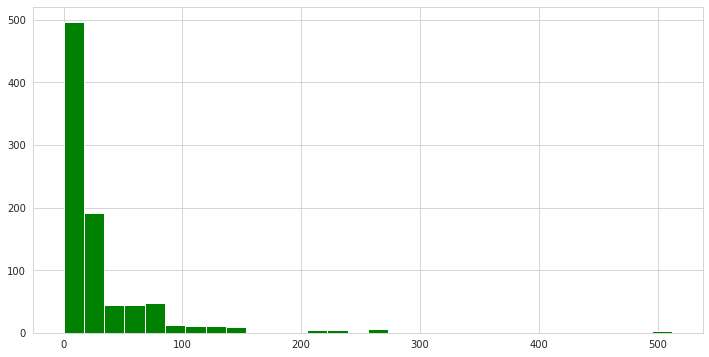

In [72]:
train['Fare'].hist(color='green', bins=30,figsize=(12,6))

- Grande parte dos passageiros pagaram valores baixos
- abaixo um zoom desses dados

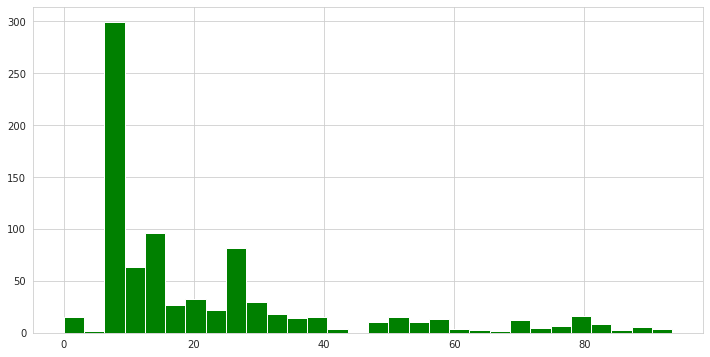

In [73]:
train[train['Fare']<100]['Fare'].hist(color='green', bins=30,figsize=(12,6))

- A grande maioria dos passageiros pagou valores entre 5-30

### Tratamento dos dados

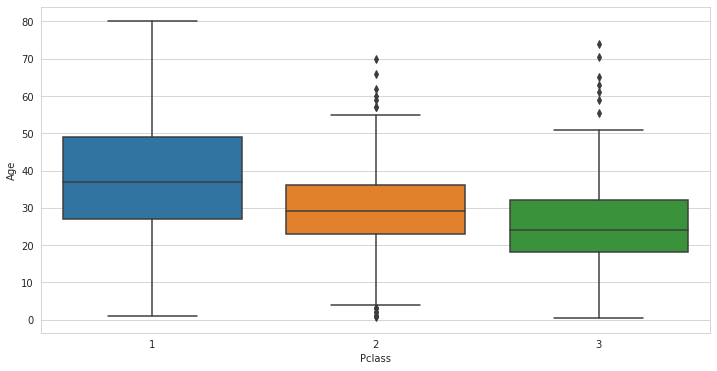

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)

#### Preenchendo os dados faltantes das idades
- Tres formas:
    Deletar dados onde as imagens estão faltando(péssimo, deletaria cerca de 25% dos dados)
    Preencher com a média das idades(Pode alterar a analise dos dados bastantes)
    Preencher com a média das idades por classe(minimiza a influencia de alteração dos dados)
    

In [75]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [76]:
def input_age(cols):
    Age = cols[0]
    Class = cols[1]
    
    if pd.isnull(Age):
        if Class == 1:
            return 38;
        elif Class == 2:
            return 30;
        else:
            return 25;
    else:
        return Age
    

In [77]:
train['Age'] = train[['Age','Pclass']].apply(input_age,axis=1)

In [78]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

- Preenchida os espaços null com as médias baseada na clase

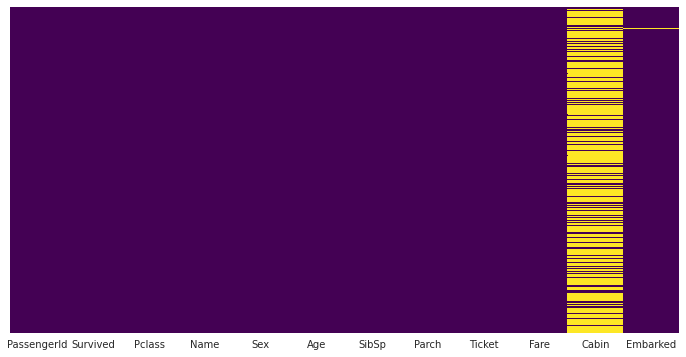

In [79]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Faltam tantas informações no Cabin que não vale apena utilizar os dados, logo a coluna será deletada

In [80]:
del train['Cabin']
# train.drop('Cabin',inplace=True)

In [81]:
train.dropna(inplace=True,axis=0)

- deleta as linhas ou colunas com dados null

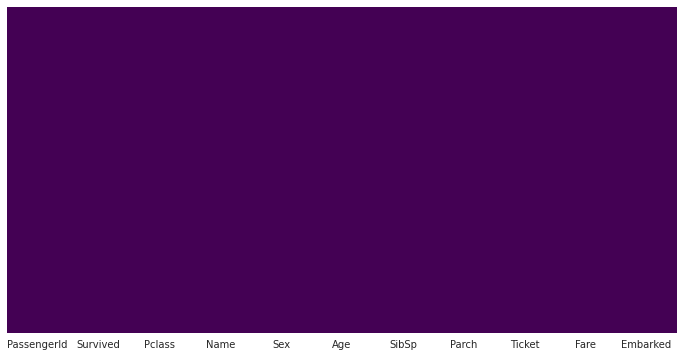

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Tratar dados categóricos que não são relevantes para a analise(ex: name e tickte)

In [83]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

- Transforma um dado categórico em dado númerico, o drop_firt impede a ocorrencia de dados com duas correspondecias eleminando uma das colunas no caso female

In [84]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- utilizando o dummie

In [85]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [86]:
train.drop(['Sex','Name','PassengerId','Ticket','Embarked'],axis=1,inplace=True)

In [87]:
train = pd.concat([train,sex,embark],axis=1)

In [89]:
train.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


### Calibrar modelo

In [90]:
from sklearn.linear_model import LogisticRegression

- dividindo em dados de treino e teste

In [91]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.3)

- Será usado para predição todos de sobrevivencia todos os dados menos os dados de sobrevivencia, e o dado a ser predito (y) é o Survived

- Criar instancia da classe

In [100]:
logmodel = LogisticRegression()

In [101]:
logmodel.fit(X_train,y_train)

/home/lucas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [103]:
predict = logmodel.predict(X_test)

- Definindo qualidade do modelo

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       153
           1       0.83      0.68      0.75       114

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.80       267



- Uma consideravel precisao de 80%

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
print(confusion_matrix(y_test,predict))

[[137  16]
 [ 36  78]]


TN = 137, FP = 16, FN = 36, TP=78